In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# a.Load an existing data set
df = pd.read_csv('drugdata.csv')
df

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,HIGH,25.355,drugY
1,1,47,M,LOW,HIGH,13.093,drugC
2,2,47,M,LOW,HIGH,10.114,drugC
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...,...
195,195,56,F,LOW,HIGH,11.567,drugC
196,196,16,M,LOW,HIGH,12.006,drugC
197,197,52,M,NORMAL,HIGH,9.894,drugX
198,198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
#b. Split the data set to train and test sets

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'])

from sklearn.model_selection import train_test_split
X = df_encoded.drop('Drug', axis=1) 
y = df_encoded['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,Unnamed: 0,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
79,79,32,10.840,1,0,0,1,0,0,1
197,197,52,9.894,0,1,0,0,1,1,0
38,38,39,9.709,1,0,0,0,1,0,1
24,24,33,33.486,1,0,0,1,0,1,0
122,122,34,22.456,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
106,106,22,11.953,0,1,0,0,1,1,0
14,14,50,12.703,1,0,0,0,1,1,0
92,92,29,29.450,1,0,1,0,0,1,0
179,179,67,15.891,1,0,0,0,1,1,0


Accuracy: 0.525


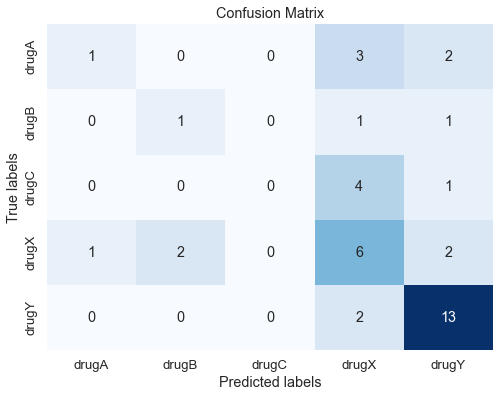

In [4]:
#c. Test your model using test set. Find accuracy and confusion Matrix.

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# K-NN implementation
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_sample in X_test.values:
        distances = [euclidean_distance(test_sample, x_train) for x_train in X_train.values]
        nearest_neighbors = np.argsort(distances)[:k]
        neighbor_labels = [y_train.iloc[i] for i in nearest_neighbors]
        y_pred.append(max(set(neighbor_labels), key=neighbor_labels.count))
    return np.array(y_pred)

# Testing different values of K
def test_k_values(X_train, y_train, X_test, y_test, k_values):
    accuracies = []
    for k in k_values:
        y_pred = knn_predict(X_train, y_train, X_test, k)
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        accuracies.append(accuracy)
    return accuracies

# Calculating confusion matrix and accuracy
k_values = range(1, 21)  # Trying K values from 1 to 20
accuracies = test_k_values(X_train, y_train, X_test, y_test, k_values)
optimal_k = k_values[np.argmax(accuracies)]
y_pred_optimal = knn_predict(X_train, y_train, X_test, optimal_k)

# Confusion matrix
def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    num_classes = len(classes)
    conf_matrix = np.zeros((num_classes, num_classes))
    for i in range(num_classes):
        true_indices = np.where(y_true == classes[i])
        pred_classes = y_pred[true_indices]
        for j in range(num_classes):
            conf_matrix[i, j] = np.sum(pred_classes == classes[j])
    return conf_matrix

# Plotting confusion matrix
def plot_confusion_matrix(conf_mat, classes):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Calculating confusion matrix
conf_mat = confusion_matrix(y_test.values, y_pred_optimal)

# Calculate accuracy
accuracy = np.sum(y_test == y_pred_optimal) / len(y_test)
print("Accuracy:", accuracy)

# Plotting the confusion matrix
plot_confusion_matrix(conf_mat, np.unique(y_test))

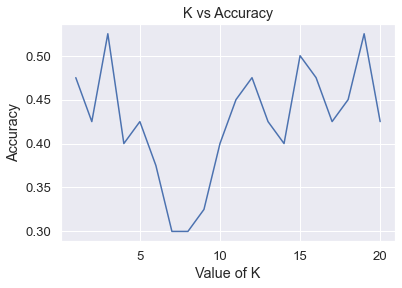

Value of K for maximum accuracy: 3


In [5]:
#d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs accuracy” and find out the value of k for maximum accuracy for the test samples.# Testing different values of K

k_values = range(1, 21)  
accuracies = test_k_values(X_train, y_train, X_test, y_test, k_values)

# Plotting k vs accuracy curve
plt.plot(k_values, accuracies)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

# Finding the value of k for maximum accuracy
optimal_k = k_values[np.argmax(accuracies)]
print("Value of K for maximum accuracy:", optimal_k)

# Predicting using the optimal K
y_pred_optimal = knn_predict(X_train, y_train, X_test, optimal_k)